# Introduction to data wrangling with pandas

NICAR 2022, Jonathan Soma / js4571@columbia.edu / [@dangerscarf](https://twitter.com/dangerscarf)

Featuring incredibly weird and wild data from the [National Electronic Injury Surveillance System (NEISS)](https://www.cpsc.gov/Research--Statistics/NEISS-Injury-Data).

## Reading in our data

I'll give you this one for free!

In [78]:
import pandas as pd
import numpy as np

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [79]:
df = pd.read_csv("neiss_cleaned.tsv", sep='\t', encoding='latin-1')
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
1,170100734,01/01/2017,71,1,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,1,1.0,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE,"DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM",S,46.0,77.6641
3,170100737,01/01/2017,55,2,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FOOTING AND FELL. DX CLOSED,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,2,1.0,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD STRIKING BACK ON A *** HUTC,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


## Cleaning up our data

### Age

In [80]:
df.Age.median()

29.0

<AxesSubplot:>

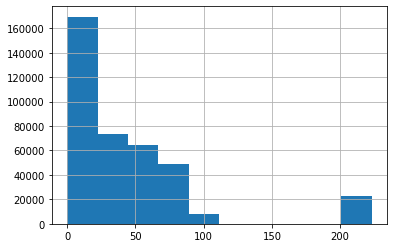

In [81]:
df.Age.hist()

<AxesSubplot:>

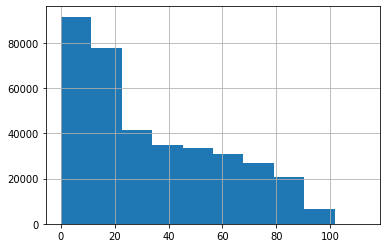

In [82]:
df = df[df.Age < 200]
df.Age.hist()

## Gender

In [83]:
df.Sex.value_counts()

1    196180
2    167901
0         7
Name: Sex, dtype: int64

In [84]:
df.Sex = df.Sex.replace({
    1: 'Male',
    2: 'Female',
    0: np.nan
})

In [85]:
df.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,Male,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
1,170100734,01/01/2017,71,Male,1.0,NaN,31.0,53.0,NaN,1.0,5.0,0.0,1807.0,0.0,71YOM FELL ON FLOOR IN BATHROOM. DX RIB CONTUSION,NaN,S,46.0,77.6641
2,170100735,01/01/2017,16,Male,1.0,NaN,33.0,51.0,NaN,1.0,1.0,0.0,676.0,342.0,16YOM TRIPPED OVER A RUG AND FELL INTO A BURNING FIREPLACE,"DX BURNS INVOLVING LESS THAN 10% OF BODY SURFACE, FOREARM",S,46.0,77.6641
3,170100737,01/01/2017,55,Female,1.0,NaN,75.0,62.0,NaN,1.0,1.0,0.0,620.0,0.0,55YOF WAS STANDING ON A STEP STOOL AND LOST FOOTING AND FELL. DX CLOSED,HEAD INJURY,S,46.0,77.6641
4,170100740,01/01/2017,86,Female,1.0,NaN,79.0,58.0,NaN,1.0,1.0,0.0,1646.0,4056.0,86YOF GOT TANGLED IN COAT AND FELL BACKWARD STRIKING BACK ON A *** HUTC,"H. DX HEMATOMA OF SOFT TISSUE, LEFT FLANK",S,46.0,77.6641


In [87]:
df.Sex.value_counts()

Male      196180
Female    167901
Name: Sex, dtype: int64

In [88]:
df.Sex.value_counts(normalize=True)

Male      0.538836
Female    0.461164
Name: Sex, dtype: float64

### Race

In [89]:
df.Race.value_counts()

1.0    151268
0.0    136992
2.0     51135
3.0     18907
4.0      4223
5.0      1175
6.0       388
Name: Race, dtype: int64

In [90]:
df.Race = df.Race.replace({
    1: 'White',
    2: 'Black/African American',
    4: 'Asian',
    5: 'American Indian/Alaskan Native',
    6: 'Native Hawaiian/Pacific Islander',
    3: 'Other',
    0: np.nan
})

In [91]:
df.Race.value_counts()

White                               151268
Black/African American               51135
Other                                18907
Asian                                 4223
American Indian/Alaskan Native        1175
Native Hawaiian/Pacific Islander       388
Name: Race, dtype: int64

## Searching through our data

In [92]:
df.Other_Race.value_counts()

HISPANIC           15731
UNKNOWN             2239
MULTI-RACIAL        2004
HISP                 761
SOMALI               361
                   ...  
ISRAELI                1
URDU                   1
HYSPANIC/LATINO        1
OTHER                  1
- LAC. TO SCALP        1
Name: Other_Race, Length: 101, dtype: int64

In [93]:
df.Other_Race.value_counts().head(30)

HISPANIC        15731
UNKNOWN          2239
MULTI-RACIAL     2004
HISP              761
SOMALI            361
NS                300
UNKN              118
BIRACIAL           37
NEPALI             36
MULTIRACIAL        28
MULTI RACIAL       24
NON HISPANIC       14
ARAB               13
PUERTO RICAN       13
MEXICAN            13
DECLINE            12
`                  11
DO NOT KNOW        11
UNK                10
SPANISH             8
HISPAINC            8
DECLINED            7
HISAPNIC            6
FULANI              5
MANDARIN            5
HISPANCI            5
NOT STATED          4
N/S                 4
HISPAINIC           4
LAO                 4
Name: Other_Race, dtype: int64

In [94]:
df[df.Other_Race.str.contains("HISP", na=False)]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
117,170106102,01/01/2017,4,Male,Other,HISPANIC,75.0,59.0,NaN,1.0,0.0,0.0,379.0,0.0,4 YOM FELL AND HIT RADIATOR. DX SCALP LACERATION,NaN,C,31.0,4.7570
156,170106239,01/02/2017,10,Female,Other,HISPANIC,36.0,59.0,NaN,1.0,1.0,0.0,1842.0,0.0,10YOF WITH LAC TO LOWER LEG FROM ON STEPS,NaN,V,61.0,16.1828
173,170106715,01/01/2017,6,Male,Other,HISPANIC,75.0,52.0,NaN,1.0,1.0,0.0,1807.0,0.0,6YOM- PT WAS RUNNING IN THE HOME FELL STUCK HEAD ONTO THE FLOOR,VOMITED X 2. ACTING SLEEPY. DX- CONCUSSION.,C,90.0,4.7570
174,170106719,01/01/2017,18,Male,Other,HISPANIC,79.0,64.0,NaN,1.0,1.0,0.0,604.0,0.0,18YOM-PT WAS HOME MOVING A DRESSER SOMETHING POPPED NOW PAIN TO,ABDOMINAL AREA. DX- STRAIN OF LEFT SIDED ABDOMIN.,C,90.0,4.7570
177,170106722,01/01/2017,10,Male,Other,HISPANIC,0.0,41.0,NaN,1.0,1.0,0.0,1682.0,0.0,10YOM-PT HAD A BOBBY PIN IN MOUTH & ACCIDENTALLY SWALLOWED.,DX- SWALLOWED BOBBY PIN.,C,90.0,4.7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386571,180236096,12/28/2017,4,Female,Other,HISPANIC,92.0,56.0,NaN,1.0,0.0,0.0,5021.0,0.0,4YOF PLAYING WITH REMOTE CONTROL TOY CAR AND GOT ANTENNA STUCK IN FINGE,R DX FOREIGN BODY OF FINGER/,C,10.0,4.7570
386662,180240257,12/24/2017,26,Female,Other,HISPANIC,37.0,64.0,NaN,1.0,0.0,0.0,1615.0,0.0,26YOF S/P TRIP/FALL WEARING SANDALS 34WKS PREGNANT,DX: L ANKLE SPRAIN,V,40.0,16.9919
386664,180240261,12/24/2017,54,Female,White,HISPANIC,34.0,57.0,NaN,1.0,1.0,0.0,612.0,0.0,54YOF C/O WRIST PAIN S/P FALL ON MAT,DX:L DISTAL RADIUS FX,V,40.0,16.9919
386878,180304321,12/14/2017,17,Female,Other,HISPANIC,35.0,64.0,NaN,1.0,9.0,0.0,1272.0,0.0,17YOHF INJ KNEE DURING GYMNASTIC RPTS DOING JUMP AND KNEE TWISTED FELT,A POP: DX KNEE SPRAIN/SPAIN LAT COLL LIG KNEE/SPRAIN MEDIAL COLL LIG KN,V,67.0,16.9919


In [96]:
df[df.Other_Race.str.contains("HISP", na=False)].Other_Race.value_counts()

HISPANIC        15731
HISP              761
NON HISPANIC       14
HISPAINC            8
HISPANCI            5
HISPAINIC           4
HISPANIC.           2
NONHISPANIC         2
HISPANICE           2
HISPANI             1
`HISPANIC           1
HISPANIC10          1
HISPANICX           1
HISPOANIC           1
HISPAIN             1
HISPANC             1
?HISPANIC           1
HISPANINC           1
NON-HISPANIC        1
HISPANIC1           1
Name: Other_Race, dtype: int64

## Wall punching!

In [97]:
df[df.Narrative_1.str.contains("PUNCH")]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
0,170100733,01/01/2017,21,Male,White,NaN,75.0,62.0,NaN,1.0,1.0,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641
32,170102931,01/01/2017,26,Male,NaN,NaN,82.0,59.0,NaN,1.0,1.0,0.0,1892.0,0.0,26YOM LAC HAND- PUNCHED GLASS DOOR,NaN,M,14.0,87.0904
94,170104156,01/01/2017,26,Male,NaN,NaN,33.0,59.0,NaN,1.0,0.0,0.0,1894.0,0.0,26 YR OLD MALE PUNCHED GLASS WINDOW AND LAC FOREARM,NaN,V,38.0,16.1828
135,170106135,01/01/2017,25,Male,Black/African American,NaN,33.0,59.0,NaN,1.0,0.0,0.0,1892.0,0.0,25YOM PUNCHED A GLASS DOOR AND CUT HIS FOREARM.,DX. LAC. FOREARM.,S,29.0,77.6641
170,170106272,01/02/2017,26,Female,Black/African American,NaN,34.0,57.0,NaN,1.0,1.0,0.0,1884.0,0.0,"26YOF WITH FRACTURED WRIST, PUNCHED A WALL",NaN,V,61.0,16.1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386026,180212983,12/29/2017,31,Male,NaN,NaN,75.0,52.0,NaN,1.0,9.0,0.0,3257.0,0.0,31YM MMA FIGHTER HAD A MATCH 1WA DURING WHICH WAS PUNCHED TO FACE W/O L,"OC YET MENTAL FOGGINESS, BV&F.HEAD NUMBNESS SINCE>>CONCUSSION",V,21.0,16.9919
386148,180215154,12/30/2017,22,Male,NaN,NaN,82.0,53.0,NaN,1.0,0.0,0.0,1893.0,0.0,22YM PUNCHED A DOOR C BOTH HANDS IN ANGER YTD,>>HAND CONTS,V,21.0,16.9919
386327,180227997,12/16/2017,16,Male,White,NaN,82.0,57.0,NaN,1.0,5.0,0.0,1884.0,0.0,16YOM PUNCHED WALL IN ANGER AT INPATIENT PSYCHIATRIC HOSPITAL DX RIGHT,BOXERS FRACTURE /,C,10.0,4.7570
386402,180235384,12/17/2017,23,Male,Black/African American,NaN,92.0,59.0,NaN,1.0,0.0,0.0,1894.0,0.0,23 YOM PUNCHED A WINDOW.,DX: 5 CM LAC R FIFTH FINGER.,V,93.0,16.9919


In [98]:
punchers = df[df.Narrative_1.str.contains("PUNCH.*WALL")]
punchers

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
170,170106272,01/02/2017,26,Female,Black/African American,NaN,34.0,57.0,NaN,1.0,1.0,0.0,1884.0,0.0,"26YOF WITH FRACTURED WRIST, PUNCHED A WALL",NaN,V,61.0,16.1828
678,170109865,01/01/2017,26,Male,White,NaN,82.0,71.0,HAND PAIN,1.0,0.0,0.0,1884.0,0.0,LT HAND PAIN. 26YOM PAIN IN HAND FROM PUNCHING WALL.,NaN,V,95.0,16.1828
715,170110026,01/02/2017,24,Male,NaN,NaN,82.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,24 YOM C/O L HAND PAIN AND SWELLING AFTER PUNCHING A WALL. DX L HAND FX,/,M,76.0,87.0904
842,170111675,01/04/2017,23,Female,NaN,NaN,82.0,71.0,PAIN,6.0,0.0,0.0,1884.0,0.0,23YF C/O HAND PAIN P PUNCHING A WALL C CLOSED FIST,>>PAIN,V,21.0,16.1828
1050,170113068,01/02/2017,23,Female,NaN,NaN,82.0,59.0,NaN,1.0,0.0,0.0,1884.0,0.0,23YOF PUNCHED A WALL W/ RIGHT HAND DX: OPEN WOUND OF HAND,NaN,V,35.0,16.1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385342,180155464,12/21/2017,29,Male,NaN,NaN,82.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,29YM C/O ON GOING HAND PAIN SINCE PUNCHING A WALL SEV. WKS AGO,>>FX,V,21.0,16.9919
385746,180207260,12/25/2017,21,Male,NaN,NaN,82.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,21YM C/O HAND PAIN/SWELLING P PUNCHING A WALL EARLIER,>>FX,V,21.0,16.9919
385816,180207651,12/27/2017,45,Male,NaN,NaN,82.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,45YM C/O HAND PAIN/SWELLING P PUNCHING A WALL SEV. XS,>>FX,V,21.0,16.9919
386327,180227997,12/16/2017,16,Male,White,NaN,82.0,57.0,NaN,1.0,5.0,0.0,1884.0,0.0,16YOM PUNCHED WALL IN ANGER AT INPATIENT PSYCHIATRIC HOSPITAL DX RIGHT,BOXERS FRACTURE /,C,10.0,4.7570


<AxesSubplot:>

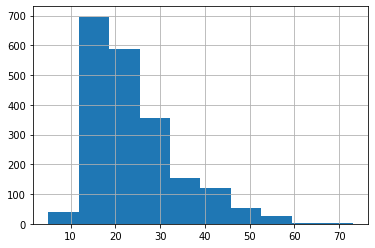

In [99]:
punchers.Age.hist()

<AxesSubplot:>

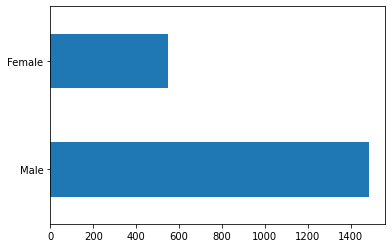

In [42]:
punchers.Sex.value_counts().plot(kind='barh')

## A supplemental dataset

We're going to merge with another dataset.

In [64]:
products = pd.read_csv("products.csv")
products.head(10)

,product_code,product_name
0,101,WASHING MACHINES WITHOUT WRINGERS OR OTHER DRYERS
1,102,WRINGER WASHING MACHINES
2,103,WASHING MACHINES WITH UNHEATED SPIN DRYERS
3,106,ELECTRIC CLOTHES DRYERS WITHOUT WASHERS
4,107,GAS CLOTHES DRYERS WITHOUT WASHERS
5,108,MANGLE IRONS
6,110,ELECTRIC HEATING PADS
7,112,SEWING MACHINES OR ACCESSORIES
8,113,FLOOR BUFFERS OR WAXERS
9,114,RUG SHAMPOOERS


In [75]:
# 136 - drinking fountain
# 1660 - umbrellas
# 1934 - hot water

df[df.Product_1 == 136]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
24686,170215425,01/30/2017,11,1,2.0,NaN,76.0,59.0,NaN,1.0,8.0,0.0,136.0,0.0,11 YOM PUSHED INTO WATER FOUNTAIN AT SCHOOL. DX: LACERATION CHEEK.,NaN,C,18.0,4.7570
27565,170309583,01/30/2017,16,1,2.0,NaN,75.0,59.0,NaN,1.0,8.0,0.0,136.0,0.0,16 YOM LAC TO HEAD WHEN HIT ON WATER FOUNTAIN AT SCHOOL,NaN,V,26.0,16.1828
36595,170233264,02/13/2017,67,1,0.0,NaN,75.0,53.0,NaN,1.0,5.0,0.0,136.0,0.0,67 YO M SLIPPED HIT HEAD ON WATER COOLER,CONTUSION HEAD,V,17.0,16.9919
39938,170241068,02/15/2017,58,1,1.0,NaN,36.0,53.0,NaN,1.0,5.0,0.0,136.0,0.0,"58 YOM FELL AGAINST A WATER FOUNTAIN FIVE DAYS AGO, NOW WITH REDNESS AN","D SWELLING TO LEFT LOWER LEG, DX: ABRASION LOWER LEG",V,61.0,16.9919
43198,170248902,02/18/2017,220,2,3.0,HISPANIC,75.0,62.0,NaN,1.0,0.0,0.0,136.0,1141.0,"*20MOF,PLAYING AT WATER COOLER FELL EMPTY WATER GALLOON AN HIT HEAD,DX:",HEAD INJURY,M,24.0,79.1731
83995,170448455,03/08/2017,5,1,2.0,NaN,75.0,62.0,NaN,1.0,5.0,0.0,136.0,0.0,5YOM WAS AT THE EYE CLINIC WHEN HE HIT HIS HEAD ON A DRINKING FOUNTAIN;,"FOREHEAD BRUISE, MINOR HEAD INJURY",C,8.0,4.7570
84813,170521218,03/16/2017,13,2,3.0,MULTI-RACIAL,75.0,62.0,NaN,6.0,5.0,0.0,136.0,1807.0,13YOF STOOD UP FROM A DRINKING FOUNTAIN AND PASSED OUT HITTING HER HEAD,"ON WOOD FLOOR AT HER RESIDENTIAL FACILITY; SYNCOPE, HEAD INJURY, LEFT",C,8.0,4.7570
92571,170428853,04/06/2017,10,1,1.0,NaN,76.0,59.0,NaN,1.0,0.0,0.0,136.0,1884.0,10 YO M EARLIER THIS AFTERNOON WAS DRINKING FROM FOUNTAIN LIFTED HIS HE,AD UP HIT CORNER OF CONCRETE WALL DX FOREHEAD LAC,L,51.0,67.2099
93659,170431328,04/10/2017,82,2,0.0,NaN,82.0,59.0,NaN,4.0,5.0,0.0,136.0,0.0,82YOF FROM THE DETOX CENTER FELL HIT HAND AGAINST THE WATER FOUNTAIN LA,CERATION TO HAND ADMITTED FOR DEMENTIA,V,2.0,15.4472
94444,170433376,04/08/2017,77,2,1.0,NaN,76.0,53.0,NaN,1.0,5.0,0.0,136.0,0.0,77 Y/O F GOT HIT IN FACE WITH TOP OFF DRINK FOUNTAIN AT ***'S AND SUSTA,INED A CONTUSION TO FACE,S,70.0,77.6641


## Merging our datasets

In [76]:
merged = df.merge(products, left_on='Product_1', right_on='product_code')
merged.head()

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,...,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight,product_code,product_name
0,170100733,01/01/2017,21,1,1.0,NaN,75.0,62.0,NaN,1.0,...,0.0,1207.0,0.0,21YOM WAS BOXING WITH FRIEND WHILE DRINKING AND GOT PUNCHED IN THE FACE,. BAC= 93.6 DX HEAD INJURY AND ALCOHOL INTOXICATION,S,46.0,77.6641,1207,"BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"
1,170106918,01/01/2017,12,1,2.0,NaN,82.0,53.0,NaN,1.0,...,0.0,1207.0,0.0,"12 YOM INJURED HAND,WRIST,PUNCHING BOXING BAG. DX- CONTUSION RIGHT","HAND,WRIST",M,78.0,87.0904,1207,"BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"
2,170114609,01/02/2017,27,1,2.0,NaN,92.0,55.0,NaN,1.0,...,0.0,1207.0,0.0,27 YO M C/O RT THUMB PAIN OCCURRED THIS AFTERNOON AFTER BOXING DX THUMB,DISLOCATION,L,51.0,67.2099,1207,"BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"
3,170120095,01/06/2017,41,1,0.0,NaN,82.0,71.0,PAIN,6.0,...,0.0,1207.0,0.0,41YOM WAS BOXING WHEN HE HIT SOMEONE & HURT HAND DX: LEFT HAND PAIN,NaN,V,35.0,16.1828,1207,"BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"
4,170121705,01/07/2017,34,1,0.0,NaN,82.0,57.0,NaN,1.0,...,0.0,1207.0,0.0,34YOM C/O R HAND PN INJ W PUNCHING HVY BAG W WORK' OUT: DX FX METACARPA,L,V,67.0,16.1828,1207,"BOXING (ACTIVITY, APPAREL OR EQUIPMENT)"


In [46]:
merged.product_name.value_counts()

STAIRS OR STEPS                                             29076
FLOORS OR FLOORING MATERIALS                                27740
BEDS OR BEDFRAMES, OTHER OR NOT SPECIFIED                   16806
BASKETBALL, ACTIVITY AND RELATED EQUIPMENT                  15496
BICYCLES AND ACCESSORIES, (EXCL.MOUNTAIN OR ALL-TERRAIN)    12359
                                                            ...  
ROTISSERIES                                                     1
POTHOLDERS, OVEN MITTS OR HOT PADS                              1
KEROSENE GRILLS OR STOVES                                       1
PERSONAL FITNESS/ACTIVITY TRACKERS                              1
OTHER TOY WEAPONS (PROJECTILE)                                  1
Name: product_name, Length: 756, dtype: int64

In [51]:
merged[merged.Narrative_1.str.contains("PUNCH")].product_name.value_counts().head(20)

CEILINGS AND WALLS (INTERIOR PART OF COMPLETED STRUCTURE)       2002
WINDOWS AND WINDOW GLASS, OTHER THAN STORM WINDOWS               541
DOORS, OTHER OR NOT SPECIFIED                                    290
BOXING (ACTIVITY, APPAREL OR EQUIPMENT)                          178
MIRRORS OR MIRROR GLASS                                          123
REFRIGERATORS                                                     63
FLOORS OR FLOORING MATERIALS                                      62
TELEVISIONS                                                       60
POLES                                                             59
GLASS DOORS OR DOORS WITH GLASS PANELS                            58
LOCKERS                                                           52
CABINETS, RACKS, ROOM DIVIDERS AND SHELVES, NEC                   44
DESKS, CHESTS, BUREAUS OR BUFFETS                                 43
TABLES (EXCL.  BABY CHANGING TABLES, BILLIARD OR POOL TABLES      31
FENCES OR FENCE POSTS             